# Reusable code to insert missing dats in a multiseries data 


Often when we work in a real world dataset, we see that timestamps are not regular. This creates an issue to build a forecasting model because time aware forecasting will expect a frequent time stamp rows to understand the trend and seasonality. Especially in retail set up, we see that some products are more frequent in demand and some are not which leads to missing time stamps.

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from IPython.display import display, Image

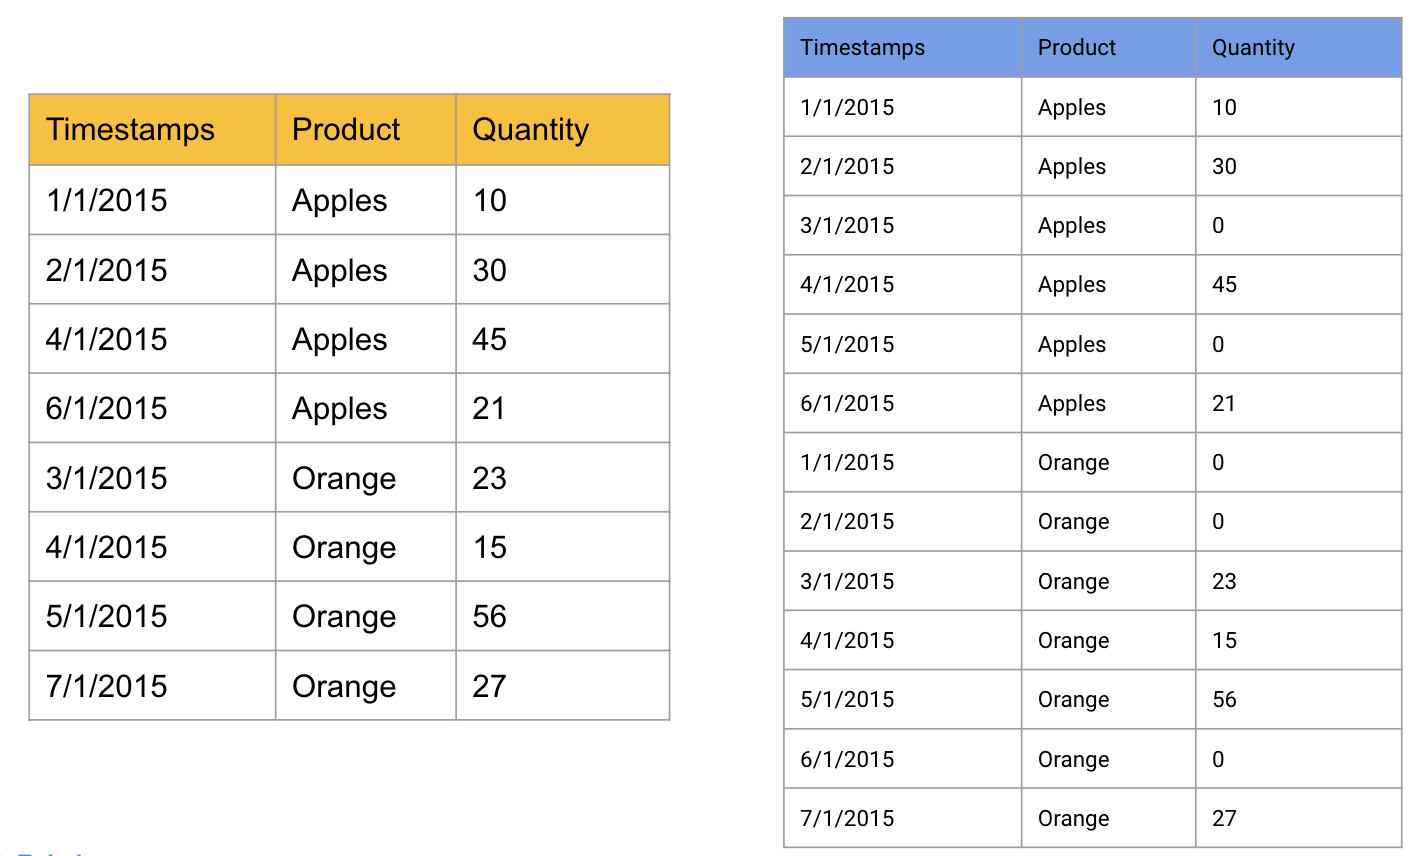

In [22]:
#![example](img/miss_values.png )
Image(filename='img/miss_values.png',embed = True, height= 100, width=600)

There are couple of approaches you can follow to impute missing values in the time series dataset
- Impute it with a mean 
- Impute it with median 
- Last observation carried forward (LOCF)
- Next observation carried backward (NOCB)
- Linear interpolation
- Spline interpolation


In [28]:
df = pd.read_csv('../training.csv')

In [30]:
df['Date'] = pd.to_datetime(df['Date']) # connverting the timestamp column to datatime 

In [32]:
group =['Date','Department'] # This would be your unique series id eg. product, department, store_name, store_location etc
fill_value = 0 # Value to impute. In this case, we are imputing it with 0
freq = 'D' # frequency of the data, is it daily, monthyl, bi-weekly, yearly 
grouping_level = 1 # sort the df by date (level =0) or by the series id (level=1)

In [33]:
def fill_missing_dates(df, series, fill_value, freq, grouping_level):
    df = df.set_index(series).unstack(
        fill_value = fill_value).asfreq(freq, fill_value = fill_value).stack().sort_index(
        level = grouping_level).reset_index()
    return df
      

In [23]:
daily = fill_missing_dates(df,group, fill_value, freq, grouping_level)

NameError: name 'fill_missing_dates' is not defined